Ile kolorów jest potrzebne żeby wiernie odwzorować zdjęcie kredek.
Grupowanie na homogeniczne klastry, które różnią się między sobą.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.cluster import KMeans

In [4]:
olowki = plt.imread("pencils.jpg", format='jpg')

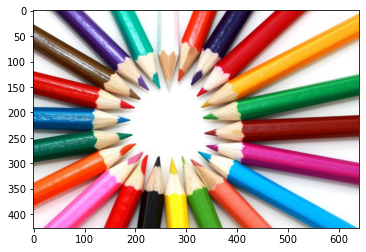

In [5]:
plt.imshow(olowki)

In [6]:
olowki_flat = olowki.reshape(-1,3) #utworzenie tablicy 1-wymiarowej z początkowej 3-wymiarowej
olowki_flat

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [216, 255, 252],
       [243, 255, 242],
       [255, 255, 236]], dtype=uint8)

In [7]:
df = pd.DataFrame(olowki_flat, columns=['x1', 'x2', 'x3'])

In [8]:
df

,x1,x2,x3
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
273275,104,203,232
273276,167,235,248
273277,216,255,252
273278,243,255,242


Wybranie najlepszej liczby klastrów za pomocą inercji i wykresu osypiska

## Inercja

suma kwadratów różnic pomiędzy każdym obiektem ($x_i$) a środkiem klastra ($C_k$):

$$\sum_{i=1}^{n}(x_i - C_k)^2$$

 - niższe wartości wskazują na wyodrębnienie bardziej spójnych grup.


In [10]:
ks = range(2,20) #zakres hipotetyczny
inercje = []

for i in ks:
    km = KMeans(n_clusters = i).fit(df[['x1', 'x2']])
    inercje.append(km.inertia_)

In [11]:
inercje

[1635772214.3356564,
 890645417.6567231,
 649980271.7550242,
 461164432.9196397,
 367030451.31329864,
 299260389.50510716,
 245610780.54617518,
 215627859.17366624,
 185867541.32312086,
 167992794.8250266,
 151635588.24181622,
 136437065.02067712,
 123977962.47721857,
 114469569.86986186,
 106749117.11469264,
 98938683.49864662,
 92611346.30481449,
 86171040.71988246]

In [12]:
inercje_df = pd.DataFrame({'K' : ks,
                          'Inercja': inercje})

In [13]:
inercje_df

,K,Inercja
0,2,1.635772e+09
1,3,8.906454e+08
2,4,6.499803e+08
3,5,4.611644e+08
4,6,3.670305e+08
5,7,2.992604e+08
6,8,2.456108e+08
7,9,2.156279e+08
8,10,1.858675e+08
9,11,1.679928e+08


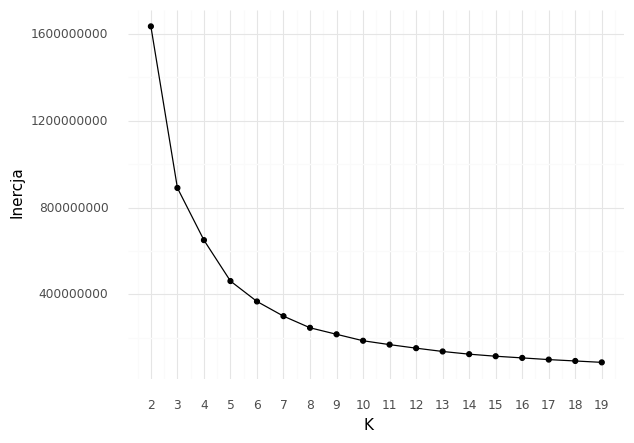

<ggplot: (164739335997)>

In [14]:
#Utworzenie wykresu osypiska
(ggplot(inercje_df, aes(x = 'K', y = 'Inercja')) +
geom_point() + geom_line() + 
scale_x_continuous(breaks = ks)  +
theme_minimal()
)

Wizualizacja wartości inercji dla wyników grupowania z przyjętymi podziałami na 𝑘 klastrów. Szukamy punktu, przy którym następuje spadek przyrostu inercji. 
Metoda łokcia – znalezienie punktu silnego przegięcia, po którym suma wariancji przestaje znacząco spadać. Ten punkt sugeruje, że podział na coraz większą liczbę skupisk w niewielkim stopniu wpływa na podniesienie jakości grupowania (wyodrębnienia spójnych klastrów).

Na podstawie powyższego wykresu, przyjmuję że powinno być 7 centrów skupień

In [16]:
kM = KMeans(n_clusters = 7)
kM.fit(olowki_flat)

In [18]:
kM.cluster_centers_ #7 kolorów zapisanych za pomocą modelu RGB, które są centrami

array([[243.53303487, 237.45062926, 235.64723673],
       [ 73.68247928,  29.59950337,  36.27043761],
       [205.58609516,  35.35668808,  32.53618328],
       [ 18.34671884, 172.83731466, 218.80855299],
       [196.1995872 , 145.04201353, 148.59649123],
       [ 45.02871935, 113.30966103,  85.99215265],
       [248.52102883, 166.95296778,  43.52080271]])

In [19]:
olowki_flat7 = olowki_flat.copy()

In [20]:
for i in np.unique(kM.labels_): 
    olowki_flat7[kM.labels_ == i, :] = kM.cluster_centers_[i] #podmienienie kolorów

In [21]:
olowki7 = olowki_flat7.reshape(olowki.shape)

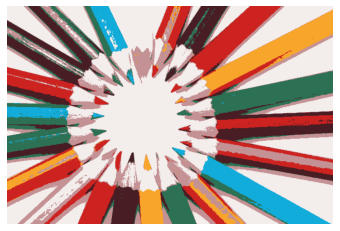

In [22]:
plt.imshow(olowki7)
plt.axis('off');